In [1]:
from psf_constants import TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX, \
                          TRAIN_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TEST_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TEST_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TEST_9M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TEST_14M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX,\
                          VALIDATION_20M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TEST_20M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH, \
                          TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,\
                          VALIDATION_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          TEST_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH

from data_utils import generate_zernike_psf_complex_fields,\
                       generate_psf_complex_fields, \
                       compute_output_fluxes_from_complex_field, \
                       compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix, \
                       compute_lp_modes_from_complex_field

In [2]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3]],
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH,
           VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3]],
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            TEST_2M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH,
            TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
            [2, 3]],
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            TRAIN_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           VALIDATION_5M_ZERNIKE_MODE_COEFFICIENTS_FILE_PATH,
           VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3, 4, 5, 6]]}

### Output fluxes

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeModeCoefficients/TrainData/2M_zernike_mode_coefficients
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes
[2, 3]

    Generating PSFs
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields00.npy already exists
    Generating Fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes00.npy already exists
    Generating PSFs
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields01.npy already exists
    Genera

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


    Generating PSFs
    Train Subfile 03
    Generating Fluxes
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes03.npy
Total number of unique modes found: 19
    Generating PSFs
    Train Subfile 04
    Generating Fluxes
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes04.npy
Total number of unique modes found: 19
    Generating PSFs
    Train Subfile 05
    Generating Fluxes
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes05.npy
Total number of unique modes found: 19
    Generating PSFs
    Train Subfile 06
    Generating Fluxes
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/2M_zernike_output_fluxes06.npy
Total number of unique modes found: 19
Gene

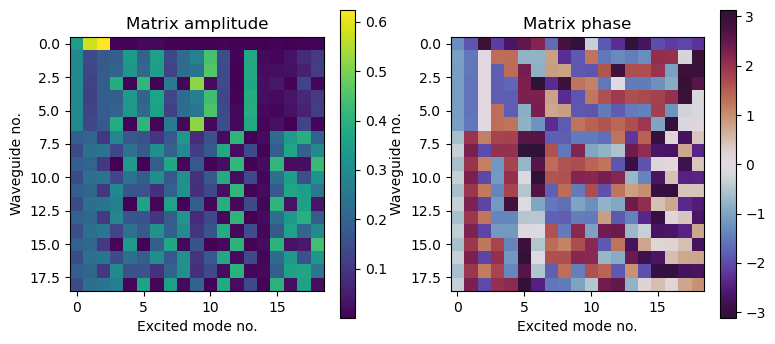

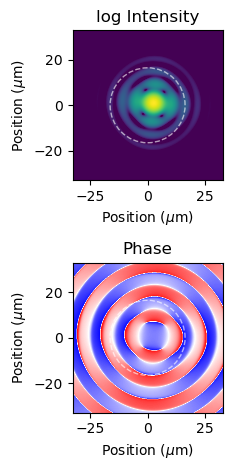

In [3]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    zernike_coeffs_path = ds_info[1]
    flux_path = ds_info[2]
    lp_coeffs_path = ds_info[3]
    zernike_modes = len(ds_info[4])
    print(psf_path)
    print(zernike_coeffs_path)
    print(flux_path)
    print(ds_info[4])
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating PSFs")
            print(f"    Train Subfile {fnumber}")
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            zernike_coeffs_filepath = f"{zernike_coeffs_path}{fnumber}{NUMPY_SUFFIX}"
            generate_zernike_psf_complex_fields(complex_fields_filepath, 
                                                zernike_coeffs_filepath,
                                                zernike_modes=zernike_modes)
            print("    Generating Fluxes")
            output_fluxes_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            lp_coeffs_filepath = f"{lp_coeffs_path}{fnumber}{NUMPY_SUFFIX}"
            compute_output_fluxes_from_complex_field(complex_fields_filepath,
                                                     lp_coeffs_filepath,
                                                     output_fluxes_filepath)
    else:
        print("    Generating PSFs")
        generate_zernike_psf_complex_fields(psf_path,
                                            zernike_coeffs_path,
                                            zernike_modes=zernike_modes)
        print("    Generating Fluxes and LP coefficients")
        compute_output_fluxes_from_complex_field(psf_path,
                                                 lp_coeffs_path,
                                                 flux_path)

### Compute LP modes and Output fluxes

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf

    Generating LP modes
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes00.npy already exists
    Generating LP modes
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes01.npy already exists
    Generating LP modes
    Train Subfile 02
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_ou

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


    Generating LP modes
    Train Subfile 05
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes05.npy
Total number of unique modes found: 42
    Generating LP modes
    Train Subfile 06
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes06.npy
Total number of unique modes found: 42
Generating V2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/ValidationData/2M_zernike_complex_fields07.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/ValidationData/PL42_2M_zernike_output_fluxes07.npy
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf
Generating TS2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFRecon

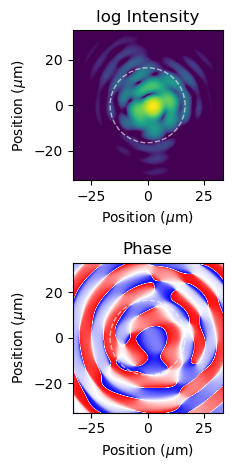

In [4]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    flux_path = ds_info[1]
    lp_path = ds_info[2]
    print(psf_path)
    print(flux_path)
    print(lp_path)
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating LP modes")
            print(f"    Train Subfile {fnumber}")
            
            #complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            #lp_coeffs_filepath = f"{lp_path}{fnumber}{NUMPY_SUFFIX}"
            #output_flux_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            #compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix(complex_fields_filepath, 
            #                                                                         lp_coeffs_filepath,
            #                                                                         output_flux_filepath,
            #                                                                         TRANSFER_MATRIX_42_MODES
            #                                                                         )

### Compute LP Modes

In [3]:
from data_utils import compute_lp_modes_from_complex_field

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf

    Generating LP modes
    Train Subfile 00
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf00.npy already exists
    Generating LP modes
    Train Subfile 01
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf01.npy already exists
    Generating LP modes
    Train Subfile 02
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/2M_lp_modes_from_zernike_psf02.npy already exists
    Generating LP modes
    Train Subfile 03
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PS

/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


    Generating LP modes
    Train Subfile 01
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/9M_lp_modes_from_zernike_psf01.npy
Total number of unique modes found: 19
    Generating LP modes
    Train Subfile 02
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/9M_lp_modes_from_zernike_psf02.npy
Total number of unique modes found: 19
    Generating LP modes
    Train Subfile 03
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/9M_lp_modes_from_zernike_psf03.npy
Total number of unique modes found: 19
    Generating LP modes
    Train Subfile 04
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/9M_lp_modes_from_zernike_psf04.npy
Total number of unique modes found: 19
    Generating LP modes
    Train Subfile 05
Computi

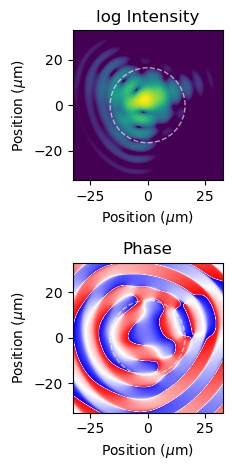

In [4]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    lp_path = ds_info[2]
    print(psf_path)
    print(lp_path)
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating LP modes")
            print(f"    Train Subfile {fnumber}")
            
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            output_lp_filepath = f"{lp_path}{fnumber}{NUMPY_SUFFIX}"
            compute_lp_modes_from_complex_field(complex_fields_filepath, 
                                                     output_lp_filepath)
    else:
        print("    Generating LP modes")
        compute_lp_modes_from_complex_field(psf_path, 
                                            lp_path)

# 42 mode Photonic Lantern 

In [1]:
from psf_constants import TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_14M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TRAIN_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, \
                          VALIDATION_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          TEST_20M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          NUMPY_SUFFIX, \
                          TRANSFER_MATRIX_42_MODES, \
                          PL42_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_VALIDATION_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TEST_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TRAIN_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_VALIDATION_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TEST_14M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TRAIN_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX, \
                          PL42_VALIDATION_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TEST_20M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH, \
                          PL42_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TEST_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_VALIDATION_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TEST_9M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TRAIN_14M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, \
                          PL42_VALIDATION_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TEST_14M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TRAIN_20M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,\
                          PL42_VALIDATION_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH, \
                          PL42_TEST_20M_ZERNIKE_PSF_LP_MODES_FILE_PATH

from data_utils import compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix

In [2]:
PATHS_DICTIONARY = {
    "TR2": [TRAIN_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            PL42_TRAIN_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_2M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3]],
    "V2": [VALIDATION_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PL42_VALIDATION_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           PL42_VALIDATION_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3]],
    "TS2": [TEST_2M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PL42_TEST_2M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PL42_TEST_2M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
            [2, 3]],
    "TR5": [TRAIN_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            PL42_TRAIN_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_5M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX,
            [2, 3, 4, 5, 6]],
    "V5": [VALIDATION_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
           PL42_VALIDATION_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
           PL42_VALIDATION_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
           [2, 3, 4, 5, 6]],
    "TS5": [TEST_5M_ZERNIKE_COMPLEX_FIELDS_FILE_PATH,
            PL42_TEST_5M_ZERNIKE_OUTPUT_FLUXES_FILE_PATH,
            PL42_TEST_5M_ZERNIKE_PSF_LP_MODES_FILE_PATH,
            [2, 3, 4, 5, 6]],
    "TR9": [TRAIN_9M_ZERNIKE_COMPLEX_FIELDS_FILE_PREFIX, 
            PL42_TRAIN_9M_ZERNIKE_OUTPUT_FLUXES_FILE_PREFIX,
            PL42_TRAIN_9M_ZERNIKE_PSF_LP_MODES_FILE_PREFIX, 
            [2, 3, 4, 5, 6, 7, 8, 9, 10]]}

Generating TR2
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeComplexFields/TrainData/2M_zernike_complex_fields
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf

    Generating LP modes
    Train Subfile 00
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes00.npy
Total number of unique modes found: 42


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:208: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))


ERROR: /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/LPModesFromZernikePSF/TrainData/PL42_2M_lp_modes_from_zernike_psf00.npy already exists.
    Generating LP modes
    Train Subfile 01
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes01.npy
Total number of unique modes found: 42
    Generating LP modes
    Train Subfile 02
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes02.npy
Total number of unique modes found: 42
    Generating LP modes
    Train Subfile 03
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ZernikeOutputFluxes/TrainData/PL42_2M_zernike_output_fluxes03.npy
Total number of unique modes found: 42
    Generating LP modes
    Train Subfile 04
Computing /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFRecon

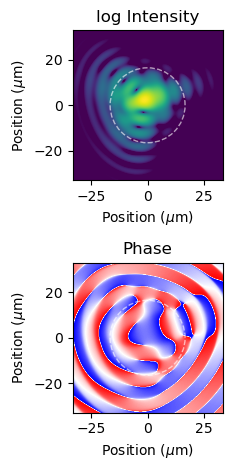

In [3]:
for dataset_name, ds_info in PATHS_DICTIONARY.items():
    print(f"Generating {dataset_name}")
    psf_path = ds_info[0]
    flux_path = ds_info[1]
    lp_path = ds_info[2]
    print(psf_path)
    print(flux_path)
    print(lp_path)
    
    if dataset_name.startswith("TR"):
        print()
        for fnumber in PSF_TRAIN_FILE_SUFFIXES:
            print("    Generating LP modes")
            print(f"    Train Subfile {fnumber}")
            
            complex_fields_filepath = f"{psf_path}{fnumber}{NUMPY_SUFFIX}"
            lp_coeffs_filepath = f"{lp_path}{fnumber}{NUMPY_SUFFIX}"
            output_flux_filepath = f"{flux_path}{fnumber}{NUMPY_SUFFIX}"
            compute_output_fluxes_from_complex_field_using_arbitrary_transfer_matrix(complex_fields_filepath, 
                                                                                     lp_coeffs_filepath,
                                                                                     output_flux_filepath,
                                                                                     TRANSFER_MATRIX_42_MODES,
                                                                                     only_lp_coeffs=True
                                                                                     )